In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib
from time import time
from pandas import datetime
import seaborn as sns
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score

register_matplotlib_converters()

<ipython-input-117-7cca104b76fa>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [83]:
apple_test_date_fill = pd.read_csv('twitter_processed.csv',index_col=False)

positive_sentiment_threshold = 0.05
negative_sentiment_threshold = -0.05
sentiments = []

for sentiment_score in df['agreement_score']:
    if sentiment_score >= 0.05:
        sentiments.append(1)
    elif sentiment_score <= -0.05:
        sentiments.append(-1)
    else:
        sentiments.append(0)

apple_test_date_fill['Sentiment'] = sentiments
apple_test_date_fill.set_index('Date')

,Open,High,Low,Close,Volume,Dividends,Stock Splits,b_score,agreement_score,First_Difference,Sentiment
Date,,,,,,,,,,,
2015-01-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0,1.307513,-0.175505,24.745998,-1
2015-01-02,25.212263,25.223581,24.297840,24.745998,212818400.0,0.0000,0.0,0.668541,0.307013,0.000000,1
2015-01-03,25.212263,25.223581,24.297840,24.745998,212818400.0,0.0000,0.0,1.849217,-0.051566,0.000000,-1
2015-01-04,25.212263,25.223581,24.297840,24.745998,212818400.0,0.0000,0.0,1.633535,-0.174221,-0.697142,-1
2015-01-05,24.510595,24.592078,23.858730,24.048857,257142000.0,0.0000,0.0,0.968036,0.038885,0.002270,0
2015-01-06,24.114502,24.315946,23.682188,24.051126,263188400.0,0.0000,0.0,1.113090,-0.023320,0.337250,0
2015-01-07,24.263887,24.490230,24.150716,24.388376,160423600.0,0.0000,0.0,1.025619,0.086810,0.937057,1
2015-01-08,24.723364,25.384283,24.603401,25.325434,237458000.0,0.0000,0.0,1.357024,-0.124145,0.027161,-1
2015-01-09,25.501979,25.633258,24.945178,25.352594,214798000.0,0.0000,0.0,0.887303,0.249515,0.000000,1


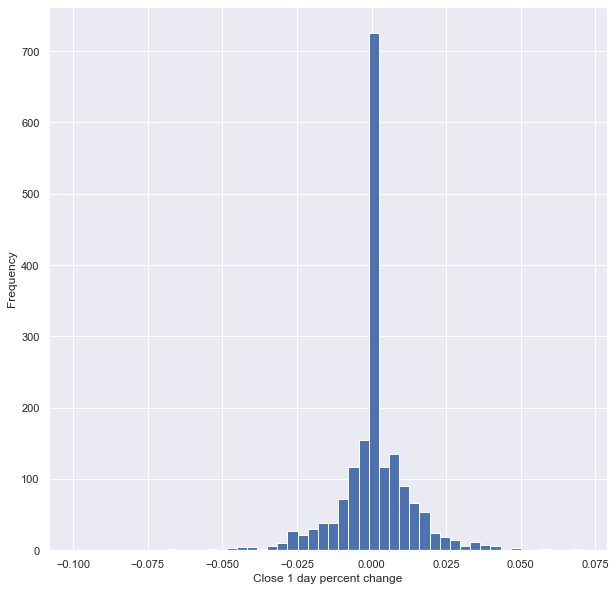

In [84]:
apple_test_date_fill['Close'][1:].pct_change().plot.hist(bins=50)
plt.xlabel("Close 1 day percent change")
plt.show()

In [85]:
feature_names = ['Sentiment']
for n in [2, 5, 10, 20]:
    apple_test_date_fill['ma' + str(n)] = talib.SMA(apple_test_date_fill['Close'].values, timeperiod=n)
    apple_test_date_fill['rsi' + str(n)] = talib.RSI(apple_test_date_fill['Close'].values, timeperiod=n)

    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]

In [86]:
apple_test_date_fill

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,b_score,agreement_score,First_Difference,Sentiment,ma2,rsi2,ma5,rsi5,ma10,rsi10,ma20,rsi20
0,2015-01-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.0,1.307513,-0.175505,24.745998,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,25.212263,25.223581,24.297840,24.745998,212818400.0,0.0000,0.0,0.668541,0.307013,0.000000,1,12.372999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-03,25.212263,25.223581,24.297840,24.745998,212818400.0,0.0000,0.0,1.849217,-0.051566,0.000000,-1,24.745998,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,25.212263,25.223581,24.297840,24.745998,212818400.0,0.0000,0.0,1.633535,-0.174221,-0.697142,-1,24.745998,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,24.510595,24.592078,23.858730,24.048857,257142000.0,0.0000,0.0,0.968036,0.038885,0.002270,0,24.397428,89.872487,19.657370,NaN,NaN,NaN,NaN,NaN
5,2015-01-06,24.114502,24.315946,23.682188,24.051126,263188400.0,0.0000,0.0,1.113090,-0.023320,0.337250,0,24.049992,89.879162,24.467596,97.260246,NaN,NaN,NaN,NaN
6,2015-01-07,24.263887,24.490230,24.150716,24.388376,160423600.0,0.0000,0.0,1.025619,0.086810,0.937057,1,24.219751,91.536646,24.396071,97.304897,NaN,NaN,NaN,NaN
7,2015-01-08,24.723364,25.384283,24.603401,25.325434,237458000.0,0.0000,0.0,1.357024,-0.124145,0.027161,-1,24.856905,95.569101,24.511958,97.449276,NaN,NaN,NaN,NaN
8,2015-01-09,25.501979,25.633258,24.945178,25.352594,214798000.0,0.0000,0.0,0.887303,0.249515,0.000000,1,25.339014,95.688195,24.633278,97.454217,NaN,NaN,NaN,NaN
9,2015-01-10,25.501979,25.633258,24.945178,25.352594,214798000.0,0.0000,0.0,1.848112,0.068690,0.000000,1,25.352594,95.688195,24.894025,97.454217,22.275698,NaN,NaN,NaN


In [87]:
apple_test_date_fill['Volume_1d_change'] = apple_test_date_fill['Volume'].pct_change()

volume_features = ['Volume_1d_change']
feature_names.extend(volume_features)

In [37]:
#apple_test_date_fill['5d_future_close'] = apple_test_date_fill['Close'].shift(-5)
#apple_test_date_fill['5d_close_future_pct'] = apple_test_date_fill['5d_future_close'].pct_change(5)

In [88]:
apple_test_date_fill.dropna(inplace=True)
X = apple_test_date_fill[feature_names]
y = apple_test_date_fill['Close']

train_size = int(0.75 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

### Random Forest Regressor

In [77]:
grid = {'n_estimators': [2000], 'max_depth': [100], 'max_features': [2, 2], 'random_state': [42]}
test_scores = []

rf_model = RandomForestRegressor()

for g in ParameterGrid(grid):
    rf_model.set_params(**g) 
    rf_model.fit(X_train, y_train)
    test_scores.append(rf_model.score(X_test, y_test))

best_index = np.argmax(test_scores)
print(test_scores[best_index], ParameterGrid(grid)[best_index])

0.7620577626559346 {'random_state': 42, 'n_estimators': 2000, 'max_features': 2, 'max_depth': 100}


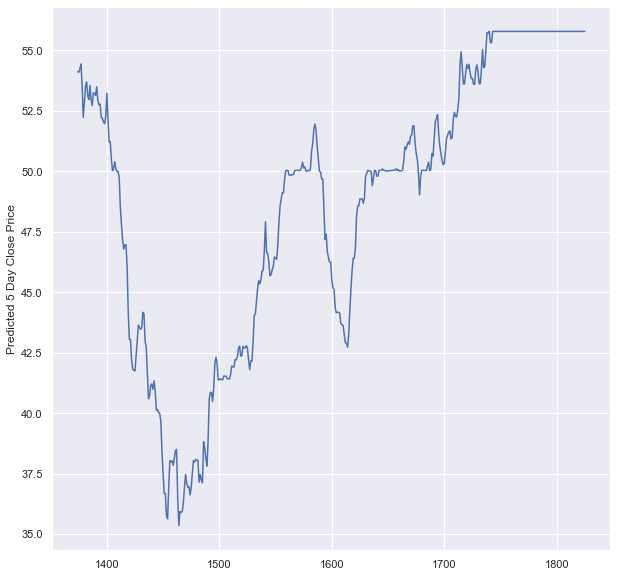

In [79]:
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=100, max_features=2, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_pred_series = pd.Series(y_pred, index=y_test.index)
y_pred_series.plot()
plt.ylabel("Predicted 5 Day Close Price")
plt.show()

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9793833416331135
Mean Squared Error: 17.159086409114906
Root Mean Squared Error: 4.14235276251491


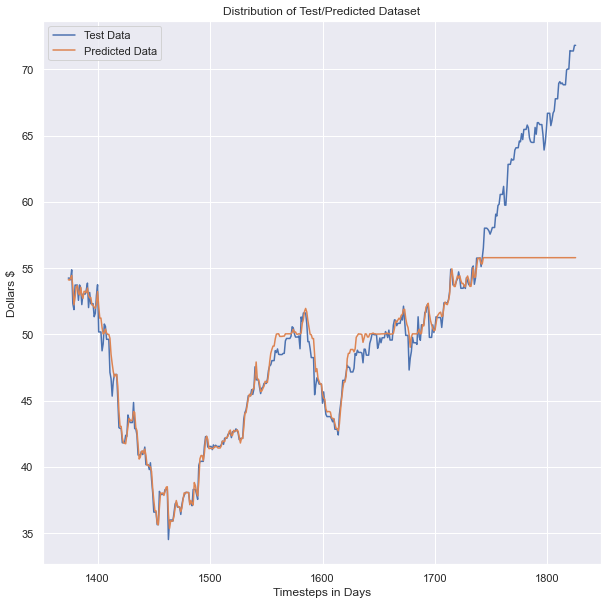

In [133]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
dfr.head(10)

# set style of charts
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 10]

# Creating a plot showing the distribution of the training, validation, and test datas
plt.plot(dfr.index,y_test, label = 'Test Data')
plt.plot(dfr.index, y_pred, label = 'Predicted Data')
plt.title('Distribution of Test/Predicted Dataset')
plt.ylabel('Dollars $')
plt.xlabel('Timesteps in Days')
plt.legend()

In [30]:
pd.set_option('display.max_rows', None)
dfr

,Actual_Price,Predicted_Price
1380,53.717415,52.969777
1381,53.717415,53.418737
1382,53.717415,53.423028
1383,52.568619,52.771019
1384,53.727085,53.126362
1385,53.494911,53.381874
1386,52.244537,52.688467
1387,53.040234,52.813009
1388,53.040234,53.059938
1389,53.040234,53.062246


### Support Vector Regressor

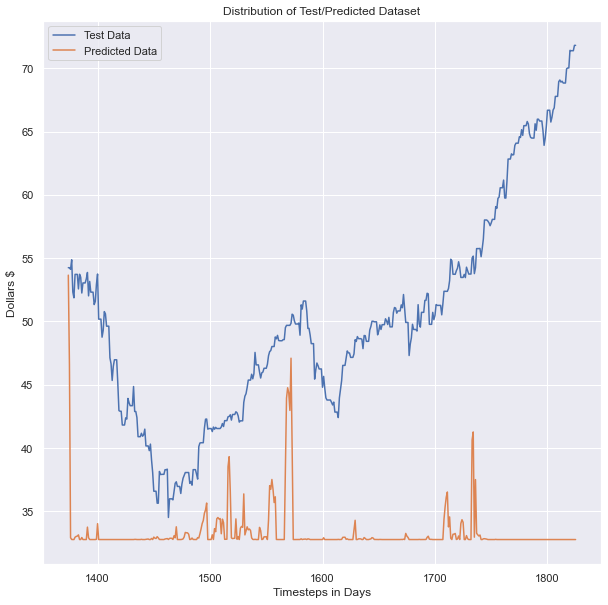

In [134]:
from sklearn import svm
from sklearn.svm import SVR 

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)
output_test_svm = svr_rbf.predict(X_test)

dfr_svr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':output_test_svm})
dfr_svr.head(10)

# set style of charts
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = [10, 10]

# Creating a plot showing the distribution of the training, validation, and test datas
plt.plot(dfr_svr.index,y_test, label = 'Test Data')
plt.plot(dfr_svr.index, output_test_svm, label = 'Predicted Data')
plt.title('Distribution of Test/Predicted Dataset')
plt.ylabel('Dollars $')
plt.xlabel('Timesteps in Days')
plt.legend()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output_test_svm))

Mean Absolute Error: 16.266749481002236


### Logistic Regression

In [99]:
df = apple_test_date_fill
df = df.set_index('Date')

In [104]:
labels = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
split = int(0.7*len(df))
train_data, test_data, label_train, label_test = df[:split], df[split:], labels[:split], labels[split:]
model = LogisticRegression()
model = model.fit(train_data,label_train)
pd.DataFrame(zip(df.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-1.1977701478114874e-15]
1,High,[-1.2035371469162878e-15]
2,Low,[-1.1944693919684562e-15]
3,Close,[-1.200701263811251e-15]
4,Volume,[-3.2307067196706702e-09]
5,Dividends,[-1.1345969568963941e-19]
6,Stock Splits,[0.0]
7,b_score,[-4.262552576134834e-17]
8,agreement_score,[-8.761333662230392e-19]
9,First_Difference,[7.009418114656188e-17]


In [106]:
probability = model.predict_proba(test_data)
print(probability)
predicted = model.predict(test_data)

[[0.55625042 0.44374958]
 [0.56348331 0.43651669]
 [0.55131326 0.44868674]
 ...
 [0.61598537 0.38401463]
 [0.61433976 0.38566024]
 [0.61433976 0.38566024]]


In [107]:
print(metrics.confusion_matrix(label_test, predicted))
print(metrics.classification_report(label_test, predicted))

[[331   0]
 [211   0]]
              precision    recall  f1-score   support

          -1       0.61      1.00      0.76       331
           1       0.00      0.00      0.00       211

    accuracy                           0.61       542
   macro avg       0.31      0.50      0.38       542
weighted avg       0.37      0.61      0.46       542



C:\Users\Chandroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chandroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chandroo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
print(model.score(test_data,label_test))

0.6107011070110702


In [118]:
cross_val = cross_val_score(LogisticRegression(), df, labels, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.63535912 0.63535912 0.63535912 0.63535912 0.63535912 0.63535912
 0.63333333 0.63333333 0.63333333 0.63333333]
0.634548802946593


###  Linear Regression

In [130]:
#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [131]:
preds = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))

Mean Absolute Error: 0.203662114546582


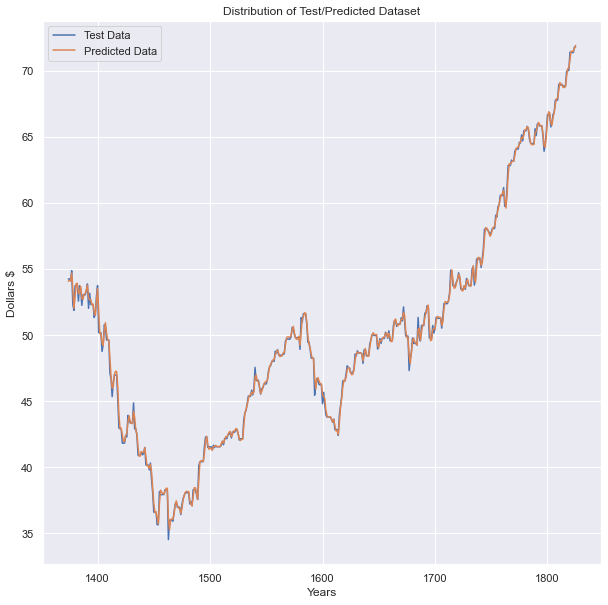

In [132]:
dfr_linear = pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':preds})
plt.plot(dfr_linear.index,y_test, label = 'Test Data')
plt.plot(dfr_linear.index, preds, label = 'Predicted Data')
plt.title('Distribution of Test/Predicted Dataset')
plt.ylabel('Dollars $')
plt.xlabel('Years')
plt.legend()